In [5]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv
Saving Copy of bank.csv to Copy of bank.csv
Saving medical_students_dataset.csv to medical_students_dataset.csv
Saving performance.csv to performance.csv
Saving Titanic-Dataset.csv to Titanic-Dataset.csv


#3.1 Basic Inspection and Exploration:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Problem 1- Data Read, Write and Inspect:

In [6]:
# 1. Load the dataset and import in pandas DataFrame
bank_df = pd.read_csv("bank.csv")

# 2. Check info of the DataFrame
print("Dataset Info:")
bank_df.info()

# Identify columns with dtypes=object
object_columns = bank_df.select_dtypes(include=['object']).columns
print(f"\nColumns with dtype=object: {list(object_columns)}")

# Unique values of those columns
print("\nUnique values in object columns:")
for col in object_columns:
    unique_vals = bank_df[col].unique()
    print(f"{col}: {unique_vals}")

# Check for total number of null values in each column
null_counts = bank_df.isnull().sum()
print(f"\nNull values in each column:")
print(null_counts)

# 3. Drop all columns with dtypes object and store in new DataFrame
bank_numeric = bank_df.select_dtypes(exclude=['object'])
bank_numeric.to_csv("banknumericdata.csv", index=False)

# 4. Read "banknumericdata.csv" and find summary statistics
bank_numeric_read = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of banknumericdata.csv:")
print(bank_numeric_read.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype=object: ['job', 'marital', 'education', 'default', 'housing', 'lo

 Problem 2- Data Imputations:

In [9]:
# 1. Load the dataset
medical_df = pd.read_csv("medical_students_dataset.csv")

# 2. Check info and identify columns with missing values
print("Medical Student Dataset Info:")
medical_df.info()

null_columns = medical_df.columns[medical_df.isnull().any()]
print(f"\nColumns with missing values: {list(null_columns)}")

# Show null counts
print("\nNull value counts:")
print(medical_df.isnull().sum())

# 3. Fill missing values using various techniques
# For numerical columns - fill with median
numerical_cols = medical_df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if medical_df[col].isnull().sum() > 0:
        medical_df[col] = medical_df[col].fillna(medical_df[col].median())
        print(f"Filled {col} with median: {medical_df[col].median()}")

# For categorical columns - fill with mode
categorical_cols = medical_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if medical_df[col].isnull().sum() > 0:
        mode_val = medical_df[col].mode()[0]
        medical_df[col] = medical_df[col].fillna(mode_val)
        print(f"Filled {col} with mode: {mode_val}")

# 4. Check for duplicate values
duplicate_count = medical_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    medical_df = medical_df.drop_duplicates()
    print("Duplicate rows removed")
else:
    print("No duplicate rows found")

Medical Student Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Columns with missing values: ['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature'

#3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:

In [11]:
# Load Titanic dataset
titanic_df = pd.read_csv("Titanic-Dataset.csv")

Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [12]:
# Create subset for specified columns where Pclass = 1
subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for Fare column
fare_stats = {
    'Mean': first_class_df['Fare'].mean(),
    'Median': first_class_df['Fare'].median(),
    'Maximum': first_class_df['Fare'].max(),
    'Minimum': first_class_df['Fare'].min()
}

print("Fare Statistics for First Class Passengers:")
for stat, value in fare_stats.items():
    print(f"{stat}: {value:.2f}")

Fare Statistics for First Class Passengers:
Mean: 84.15
Median: 60.29
Maximum: 512.33
Minimum: 0.00


 Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame.

In [13]:
# Count null values in Age column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Null values in 'Age' column: {null_age_count}")

# Drop null values from Age column
first_class_clean = first_class_df.dropna(subset=['Age'])
print(f"DataFrame shape after dropping null Age values: {first_class_clean.shape}")

Null values in 'Age' column: 30
DataFrame shape after dropping null Age values: (186, 6)


 Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton
 Task:
 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
 ’Embarked Q’, ’Embarked S’).
 2. Add these new columns to the original DataFrame.
 3. Drop the original ’Embarked’ column.
 4. Print the first few rows of the modified DataFrame to verify the changes.

In [14]:
# 1. Use one-hot encoding on Embarked column
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# 2. Add new columns to original DataFrame
titanic_encoded = pd.concat([titanic_df, embarked_dummies], axis=1)

# 3. Drop original Embarked column
titanic_encoded = titanic_encoded.drop('Embarked', axis=1)

# 4. Print first few rows to verify changes
print("First 5 rows after one-hot encoding:")
print(titanic_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

First 5 rows after one-hot encoding:
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


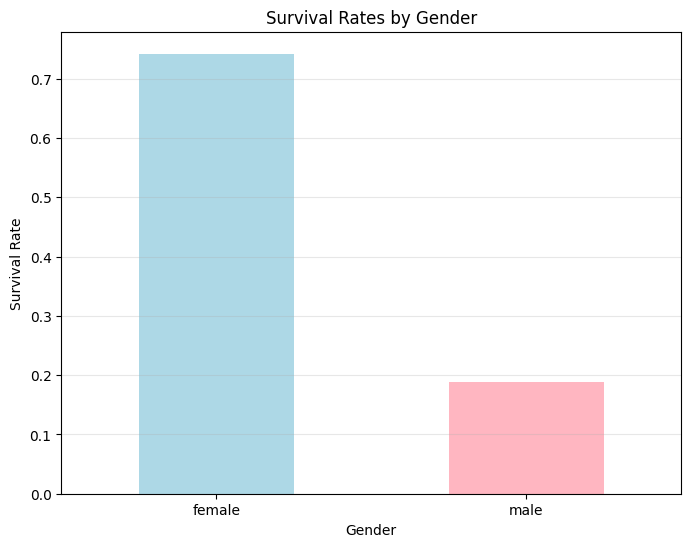

In [15]:
# Compare mean survival rates by gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_by_gender)

# Visualization
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

 Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<Figure size 1000x600 with 0 Axes>

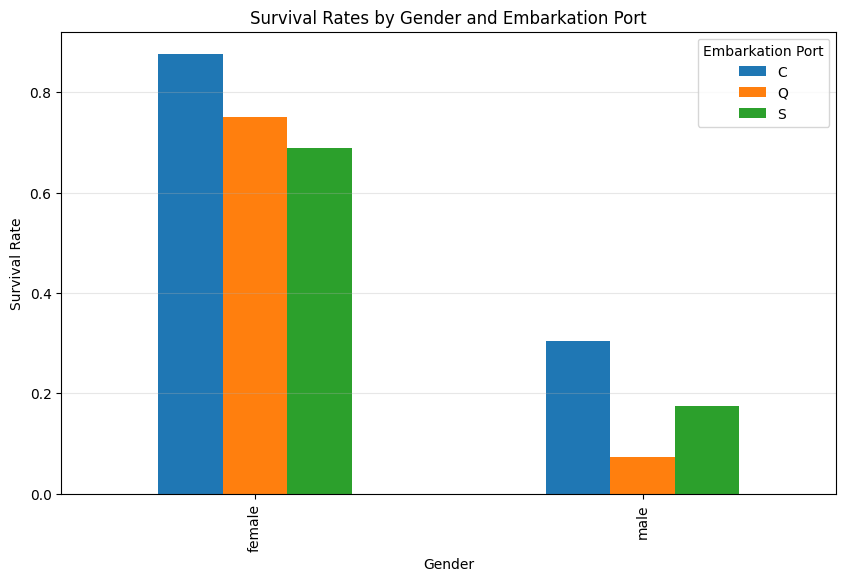

In [16]:
# Visualization comparing survival by gender and embarkation port
plt.figure(figsize=(10, 6))

# Group by Sex and Embarked, calculate mean survival
survival_by_sex_embarked = titanic_df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()

# Plot
survival_by_sex_embarked.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rates by Gender and Embarkation Port')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.legend(title='Embarkation Port')
plt.grid(axis='y', alpha=0.3)
plt.show()

 Problem- 6:
 Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
 ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
 and age group. Draw a visualization using a any plotting library to represent this graphically.

Survival Rates by Passenger Class and Age Group:
Age_Group        Q1        Q2        Q3        Q4        Q5
Pclass                                                     
1          0.809524  0.761905  0.666667  0.777778  0.506667
2          0.742857  0.400000  0.416667  0.461538  0.363636
3          0.333333  0.197674  0.283582  0.166667  0.088235


/tmp/ipython-input-2743492254.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = titanic_df.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()


<Figure size 1200x800 with 0 Axes>

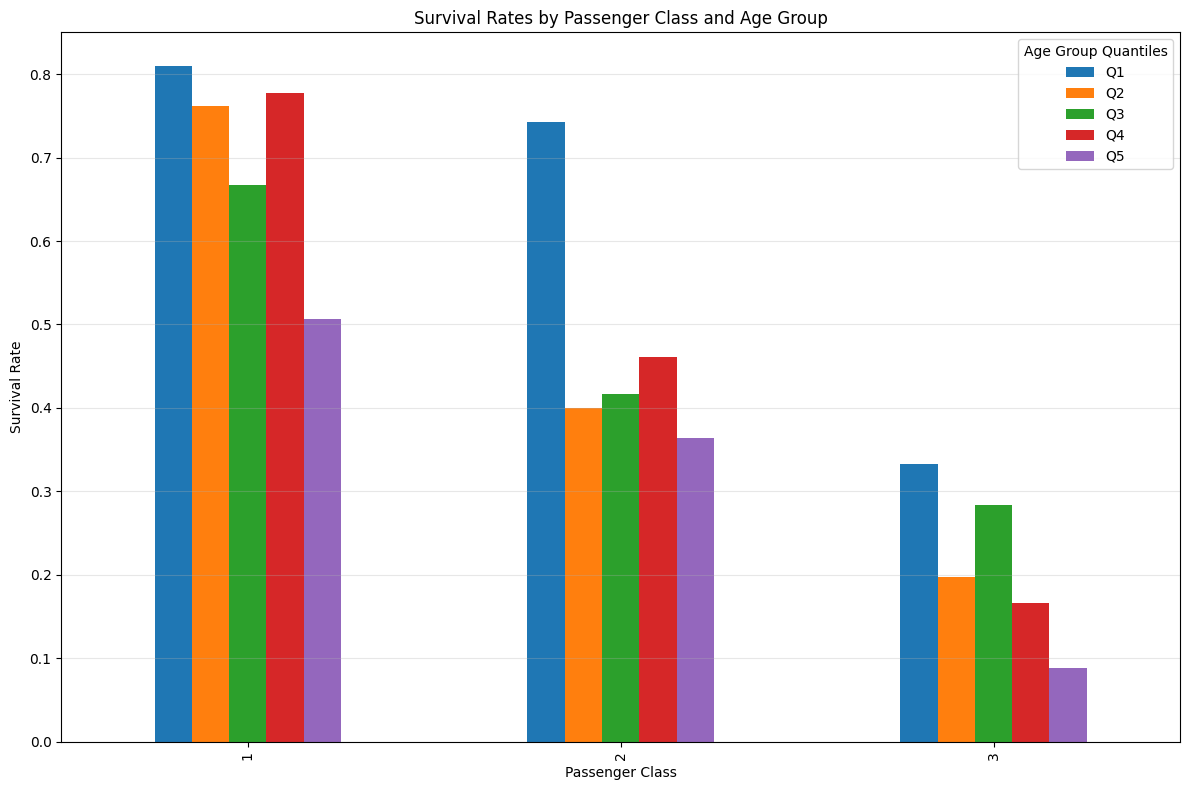

In [17]:
# Break Age column into five quantiles
titanic_df['Age_Group'] = pd.qcut(titanic_df['Age'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Compare mean survival rates by class and age group
survival_by_class_age = titanic_df.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()

print("Survival Rates by Passenger Class and Age Group:")
print(survival_by_class_age)

# Visualization
plt.figure(figsize=(12, 8))
survival_by_class_age.plot(kind='bar', figsize=(12, 8))
plt.title('Survival Rates by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Age Group Quantiles')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()